# VISUALIZING THE GENDER GAP IN STEM FIELDS & PLOT AESTHETICS

Dataset containing the percentage of bachelor's degrees awarded to women from 1972 to 2012 is released annually by [Department of Educationa Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp). A compiled and cleaned version of the data has been produced by Randal Olsen, a data scientist at the University of Pennsylvania. This notebook focuses on visualizing the data to communicate and explore the narrative gap in STEM fields of women.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### CREATING DATAFRAME AND QUICK EXPLORATION

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [3]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

The dataframe has 18 columns which all contain float objects except the 'Year' column which is an integer.

In [4]:
women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

The columns start with YEAR and contains majors offered at universities

In [6]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


#### LINE VISUALIZATION OF BIOLOGY DEGREES AWAREDED TO WOMEN OVER THE YEARS

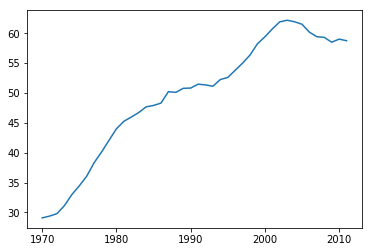

In [7]:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

In [11]:
women_degrees[['Year', 'Biology']].min()

Year       1970.000000
Biology      29.088363
dtype: float64

In [10]:
women_degrees[['Year','Biology']].max()


Year       2011.000000
Biology      62.169456
dtype: float64

From the line chart we can see that the Number of women graduating with Biology degrees steadily increased over the years. Similarly from the code above, the year with the lowest biology degree awareded to women is 1970 with 29% and the highets is 2011 with 62%.

#### LINE VISUALIZATION OF BIOLOGY DEGREES AWAREDED TO WOMEN AND MEN OVER THE YEARS

Since the goal is to understand the gender gap between majors, the visualization plots must take into account both genders.

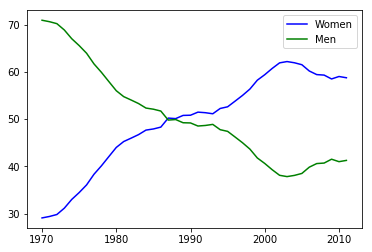

In [14]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c = 'blue', label = 'Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c = 'green', label = 'Men')
plt.legend(loc='upper right')
plt.show()

While the number of women awarded a degree in bachelors steadily increased over the years, the number of men decreased over the year. Also an intersection between the exists around late 1980's.
Between 1970 to 1987 men are a majority, whilst women are a minority. From 1987 onwards women became the majority while men a minority with an almost 20% difference ny 2011.

### Improving the Visualization
The main purpose of data visualization is to communicate information succintly and effectively without any distractions. Elements in the above diagram such as tick marks could pose a distraction to the visualization. 

#### Removing Ticks Marks

Tick Marks are removed using axes.tick_params() method by setting the angles  = 'off'

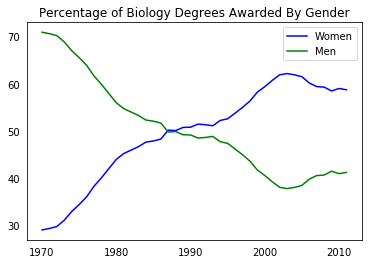

In [19]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c = 'blue', label = 'Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c = 'green', label = 'Men')
ax.legend(loc='upper right')
ax.tick_params(bottom = 'off', top = 'off', left = 'off', right = 'off')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

#### Hiding Spines
Similarly Spines become unnecessary as it's purpose inherently lies with the ticks. 

To remove spines we:
1. Access the each spine object
2. Call the spines.set_visible() method
3. Pass the Boolean False into the method

e.g. ax.spines["right"].set_visible(False)

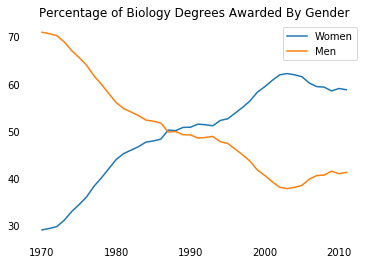

In [20]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc = 'upper right')
plt.show()

### Comparing Gender Gap across Different Degrees Categories

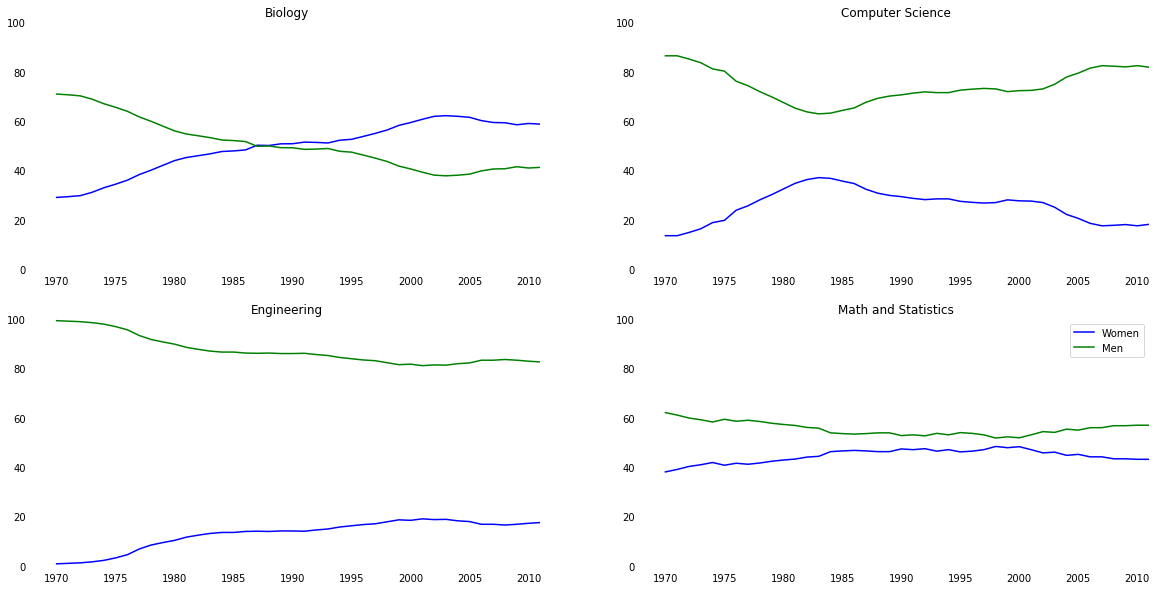

In [27]:
major_degrees = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize = (20,10))

for degree_num in range(0,4):
    ax = fig.add_subplot(2,2,degree_num+1)
    ax.plot(women_degrees['Year'], women_degrees[major_degrees[degree_num]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_degrees[degree_num]], c='green', label='Men')
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom = 'off', left = 'off', top = 'off', right = 'off')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(major_degrees[degree_num])
plt.legend()
plt.show()

From the above, we can say that Computer Science and Engineering habe a higher gender gap than Biology and Maths. Likewise the gender gap in Computer Science and Engineering have largely been wide all through the years, whilst being narrower in the others.

## IMPROVING LAYOUT, COLOURS AND ANNOTATIONS

### Setting Line Color using RGB
In computers, each RGB value can range between 0 and 255. To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).

e.g. cb_dark_blue = (0/255,107/255,164/255)

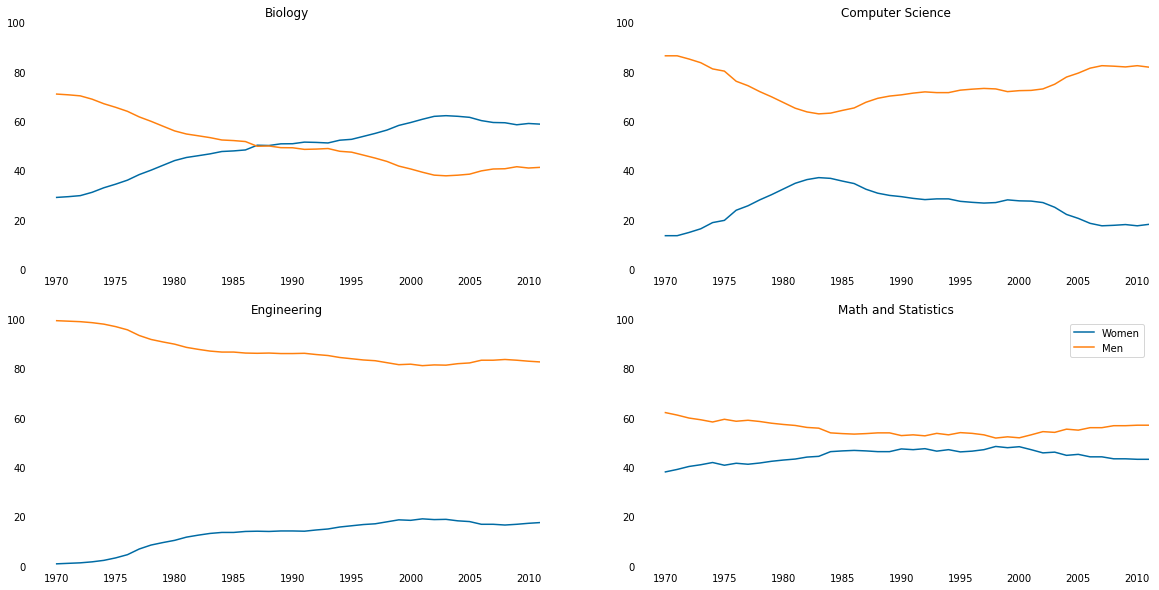

In [28]:
major_degrees = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize = (20,10))
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)
for degree_num in range(0,4):
    ax = fig.add_subplot(2,2,degree_num+1)
    ax.plot(women_degrees['Year'], women_degrees[major_degrees[degree_num]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_degrees[degree_num]], c=cb_orange, label='Men')
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom = 'off', left = 'off', top = 'off', right = 'off')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(major_degrees[degree_num])
plt.legend()
plt.show()

#### Setting Line Width

Previous linewidth has been narrow. To increase the linewidth, we pass the linewidth = int, in axes.plot() method

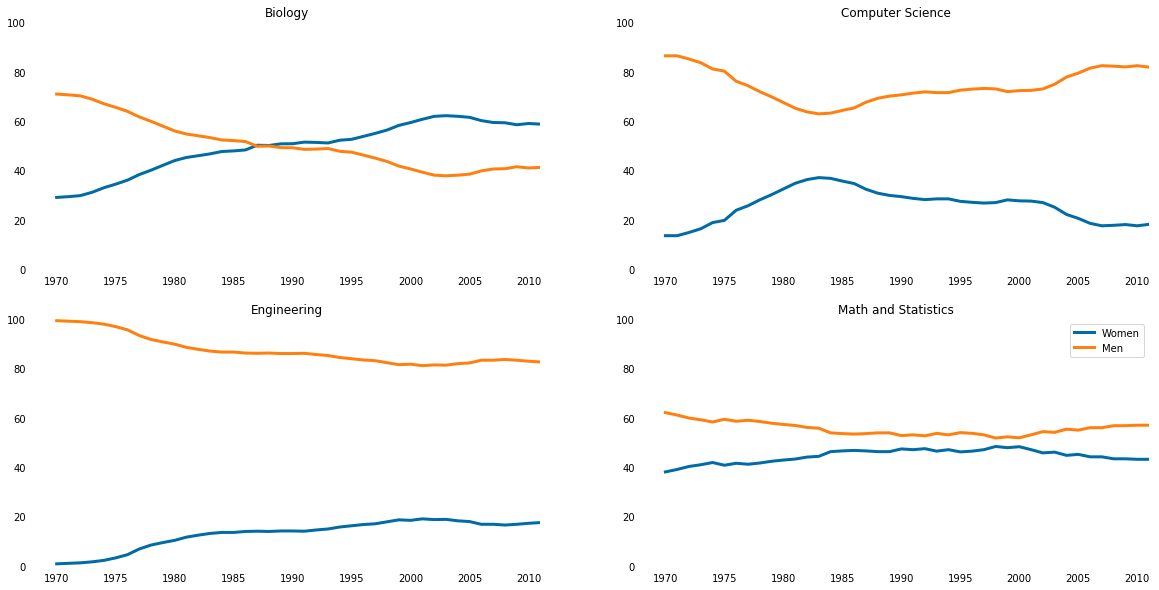

In [29]:
major_degrees = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize = (20,10))
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)
for degree_num in range(0,4):
    ax = fig.add_subplot(2,2,degree_num+1)
    ax.plot(women_degrees['Year'], women_degrees[major_degrees[degree_num]], c=cb_dark_blue, label='Women',\
            linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_degrees[degree_num]], c=cb_orange, label='Men', \
           linewidth = 3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom = 'off', left = 'off', top = 'off', right = 'off')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(major_degrees[degree_num])
plt.legend()
plt.show()

#### Changing the Layout and Visualizing STEM Degrees Only

Our main task was to visualize the gender gap between stem degrees. We will pick out the stem degrees from the dataframe, and lay them out side by side in order to get an easy comparison overview.

In [34]:
women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

Stem degrees includes  Biology, Computer Science, Engineering, Maths and Statistics, Physical Sciences and Psychology

In [31]:
stem_degrees = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

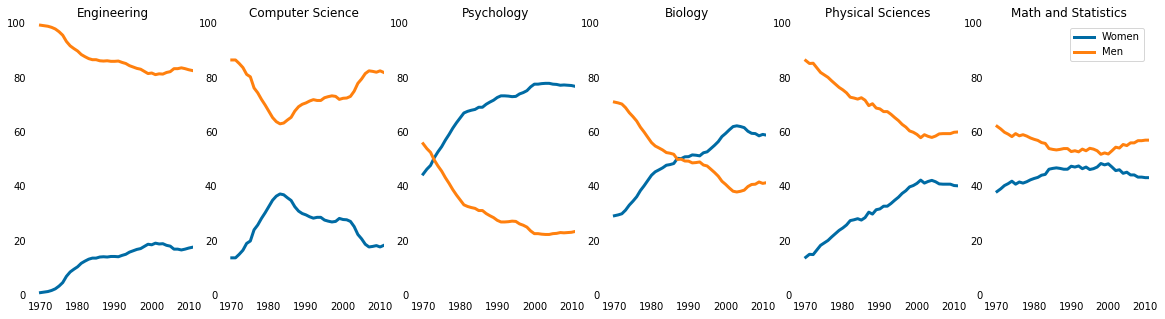

In [33]:
fig = plt.figure(figsize = (20,5))
for degree in range(0,6):
    ax = fig.add_subplot(1,6,degree+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_degrees[degree]], c = cb_dark_blue, label = 'Women',\
            linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_degrees[degree]], c = cb_orange, label = 'Men', \
            linewidth = 3)
    for key,spine in ax.spines.items():
        ax.spines[key].set_visible(False)
    ax.set_ylim(0,100)
    ax.set_xlim(1968,2011)
    ax.set_title(stem_degrees[degree])
    ax.tick_params(bottom = 'off', top = 'off', left = 'off', right = 'off')
plt.legend(loc = 'upper right')
plt.show()

### Adding Text Annotations to Line plots

To add annotations to line plots we make use of the axes.text() method and passing in the following parameters:

1. x-axis coordinate as float

2. y-axis coordinate as float

3. the text we want (as string)

Note that the values in the coordinate should exactly match the range of values in both x and y axis.

We will only be adding annotations to the first and last visualizations.

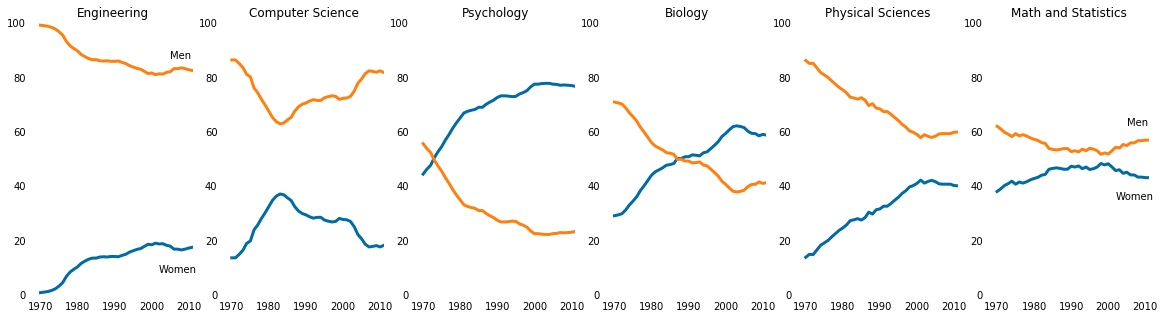

In [36]:
fig = plt.figure(figsize = (20,5))
for degree in range(0,6):
    ax = fig.add_subplot(1,6,degree+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_degrees[degree]], c = cb_dark_blue, label = 'Women',\
            linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_degrees[degree]], c = cb_orange, label = 'Men', \
            linewidth = 3)
    for key,spine in ax.spines.items():
        ax.spines[key].set_visible(False)
    ax.set_ylim(0,100)
    ax.set_xlim(1968,2011)
    ax.set_title(stem_degrees[degree])
    ax.tick_params(bottom = 'off', top = 'off', left = 'off', right = 'off')
    if degree == min(range(0,6)):
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif degree == max(range(0,6)):
        ax.text(2005, 62, 'Men')
        ax.text(2002,35, 'Women')
plt.show()

Lastly, we can say that Engineering, Computer Science and Psycholgy have the largest gender gap.
With more men graduating with Computer Science and Engineering degrees and more women graduating with Psychology Degrees. With Men dominating Engineering and CS, while women dominationg Psychology

Other stem degrees like Biology, physical science and Math have a fairly lower gender gap. However, Men dominate Maths and Physical Science, while women dominate Biology.

In conclusion, we can say that gender gap in STEM Degrees vary by subject, but overall MEN dominate more in STEM degrees than Women.